<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/NLP/exam/Category4_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# ==========================================================================================================
# PROBLEM A4
#
# Build and train a binary classifier for the IMDB review dataset.
# The classifier should have a final layer with 1 neuron activated by sigmoid.
# Do not use lambda layers in your model.
#
# The dataset used in this problem is originally published in http://ai.stanford.edu/~amaas/data/sentiment/
#
# Desired accuracy and validation_accuracy > 83%
# ===========================================================================================================

import json
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import urllib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
import matplotlib.pyplot as plt


def solution_model():
  imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

  # YOUR CODE HERE
  # Get the train and test sets
  train_data, test_data = imdb['train'], imdb['test']

  training_sentences = []
  training_labels = []
  testing_sentences = []
  testing_labels = []

  # DO NOT CHANGE THIS CODE
  # Loop over all training examples and save the sentences and labels
  for s, l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

  # Loop over all test examples and save the sentences and labels
  for s, l in test_data:

    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

  # YOUR CODE HERE
  training_labels_final = np.array(training_labels)
  testing_labels_final = np.array(testing_labels)

  # DO NOT CHANGE THIS CODE
  # Make sure you used all of these parameters or test may fail
  vocab_size = 10000
  embedding_dim = 16
  max_length = 120
  trunc_type = 'post'
  oov_tok = "<OOV>"

  # Fit your tokenizer with training data
  tokenizer =  Tokenizer(num_words=vocab_size, oov_token=oov_tok)
  tokenizer.fit_on_texts(training_sentences)
  word_index = tokenizer.word_index

  sequences = tokenizer.texts_to_sequences(training_sentences)
  padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

  testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
  testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

  #just clean the session, recomendable if we execute some times the model.
  tf.keras.backend.clear_session()

  # Model Definition with Conv1D
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.Conv1D(128, 5, activation='relu'),
      # tf.keras.layers.Conv1D(128, 5, activation='relu'),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.summary()

  MCP = tf.keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5', monitor='val_accuracy', mode='auto', save_best_only=True, save_weights_only=False, verbose=1)
  RLP = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=5, verbose=1, mode="auto", min_lr=0.000000001, cooldown=7) #, , patience=5
  ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=8, verbose=1) #min_delta=1e-4, #patience=5


  #just clean the sessio, recomendable if we execute some times the model.
  tf.keras.backend.clear_session()

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(padded, training_labels_final, epochs=50, validation_data=(testing_padded, testing_labels_final), verbose=1, callbacks=[MCP, RLP, ES])

  return model


# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_model()
    model.save("mymodel.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                        

In [1]:
# import json
# import tensorflow as tf
# import tensorflow_datasets as tfds
# import numpy as np
# import urllib
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow import keras
# import matplotlib.pyplot as plt

In [2]:
# imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# # YOUR CODE HERE
# # Get the train and test sets
# train_data, test_data = imdb['train'], imdb['test']

# training_sentences = []
# training_labels = []
# testing_sentences = []
# testing_labels = []

# # DO NOT CHANGE THIS CODE
# # Loop over all training examples and save the sentences and labels
# for s, l in train_data:
#   training_sentences.append(s.numpy().decode('utf8'))
#   training_labels.append(l.numpy())

# # Loop over all test examples and save the sentences and labels
# for s, l in test_data:

#   testing_sentences.append(s.numpy().decode('utf8'))
#   testing_labels.append(l.numpy())

# # YOUR CODE HERE
# training_labels_final = np.array(training_labels)
# testing_labels_final = np.array(testing_labels)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8RVSCZ/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8RVSCZ/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8RVSCZ/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
# # DO NOT CHANGE THIS CODE
# # Make sure you used all of these parameters or test may fail
# vocab_size = 10000
# embedding_dim = 16
# max_length = 120
# trunc_type = 'post'
# oov_tok = "<OOV>"

In [4]:
# # Fit your tokenizer with training data
# tokenizer =  Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(training_sentences)
# word_index = tokenizer.word_index

# sequences = tokenizer.texts_to_sequences(training_sentences)
# padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
# testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [5]:
# #just clean the session, recomendable if we execute some times the model.
# tf.keras.backend.clear_session()

In [32]:
# # Parameters
# embedding_dim = 16
# filters = 128
# kernel_size = 5
# dense_dim = 6

# # Model Definition with Conv1D
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Conv1D(128, 5, activation='relu'),
#     tf.keras.layers.Conv1D(128, 5, activation='relu'),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.summary()

In [19]:
# # Parameters
# # embedding_dim = 16
# lstm_dim_1 = 64
# lstm_dim_2 = 32
# dense_dim = 16

# # Model Definition with LSTM
# model_lstm = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.LSTM(128, return_sequences=True),
#     tf.keras.layers.LSTM(128),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.summary()

In [23]:
# MCP = tf.keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5', monitor='val_accuracy', mode='auto', save_best_only=True, save_weights_only=False, verbose=1)
# RLP = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=5, verbose=1, mode="auto", min_lr=0.000000001, cooldown=7) #, , patience=5
# ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=8, verbose=1) #min_delta=1e-4, #patience=5


In [35]:
# #just clean the sessio, recomendable if we execute some times the model.
# tf.keras.backend.clear_session()

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# history = model.fit(padded, training_labels_final, epochs=50, validation_data=(testing_padded, testing_labels_final), verbose=1, callbacks=[MCP, RLP, ES])

Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 0.4955 - accuracy: 0.7418
Epoch 1: val_accuracy did not improve from 0.83524
782/782 [==============================] - 21s 25ms/step - loss: 0.4955 - accuracy: 0.7418 - val_loss: 0.3938 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - ETA: 0s - loss: 0.2382 - accuracy: 0.9095
Epoch 2: val_accuracy did not improve from 0.83524
782/782 [==============================] - 6s 7ms/step - loss: 0.2382 - accuracy: 0.9095 - val_loss: 0.4415 - val_accuracy: 0.8073 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - ETA: 0s - loss: 0.0867 - accuracy: 0.9773
Epoch 3: val_accuracy did not improve from 0.83524
782/782 [==============================] - 5s 6ms/step - loss: 0.0867 - accuracy: 0.9773 - val_loss: 0.5328 - val_accuracy: 0.8047 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - ETA: 0s - loss: 0.0198 - accuracy: 0.9974
Epoch 4: val_accuracy did not

In [7]:
# %matplotlib inline
# %config InlineBackend.fugure_format = 'retina'
# def plot_loss_acc(history):
#   #-----------------------------------------------------------
#   # Retrieve a list of list results on training and test data
#   # sets for each training epoch
#   #-----------------------------------------------------------
#   acc      = history.history[     'accuracy' ]
#   val_acc  = history.history[ 'val_accuracy' ]
#   loss     = history.history[    'loss' ]
#   val_loss = history.history['val_loss' ]
#   epochs   = range(len(acc)) # Get number of epochs
#   #------------------------------------------------
#   # Plot training and validation accuracy per epoch
#   #------------------------------------------------
#   plt.plot  ( epochs,     acc, label='Training accuracy' )
#   plt.plot  ( epochs, val_acc, label='Validation accuracy' )
#   plt.title ('Training and validation accuracy')
#   plt.grid()
#   plt.legend()
#   plt.xlabel("Epochs")
#   plt.ylabel("Accuracy")
#   plt.figure()
#   #------------------------------------------------
#   # Plot training and validation loss per epoch
#   #------------------------------------------------
#   plt.plot  ( epochs,     loss, label='Training loss' )
#   plt.plot  ( epochs, val_loss, label='Validation loss' )
#   plt.grid()
#   plt.legend()
#   plt.xlabel("Epochs")
#   plt.ylabel("Loss")
#   plt.title ('Training and validation loss'   )

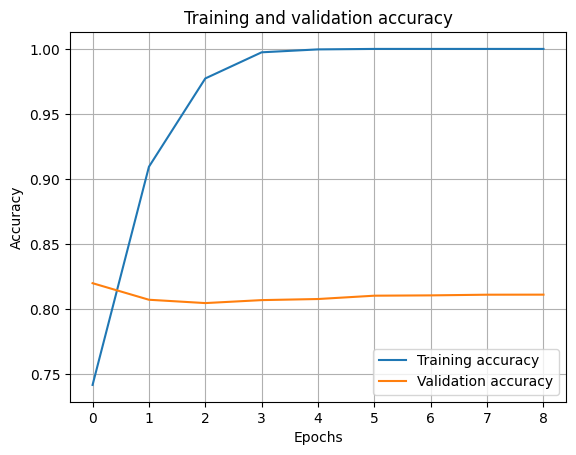

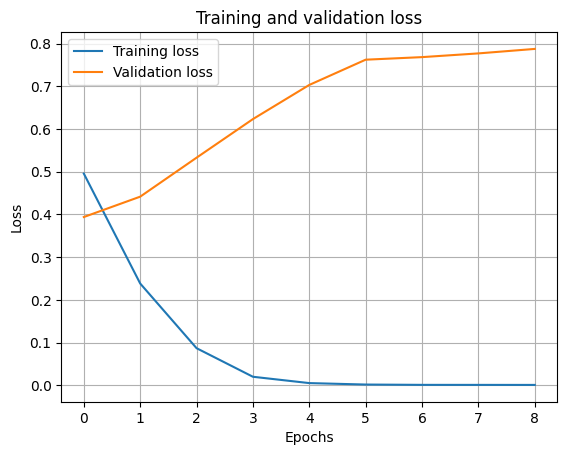

In [38]:
# # Plot training results
# plot_loss_acc(history)